# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [6]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [7]:
# Code to read data from csv file
elearn = pd.read_csv("ExtraaLearn.csv")

In [8]:
# Copying data to another variable to prevent changes to original data
data = elearn.copy()

In [9]:
# Code to check the shape of the data
data.shape

(4612, 15)

In [10]:
# Code to view the top 5 rows of the data and bottom 5 rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [11]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [12]:
# Data types of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [13]:
# To check if there are any missing values
data_missing = data.isna().sum()
print(data_missing)


ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


- There are no missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [14]:
# Statistical summary of the data 
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [15]:
# Impact of current occupation on lead status
occupation_lead = data.groupby('current_occupation')['status'].mean().reset_index()
print(occupation_lead)

  current_occupation  status
0       Professional 0.35512
1            Student 0.11712
2         Unemployed 0.26579


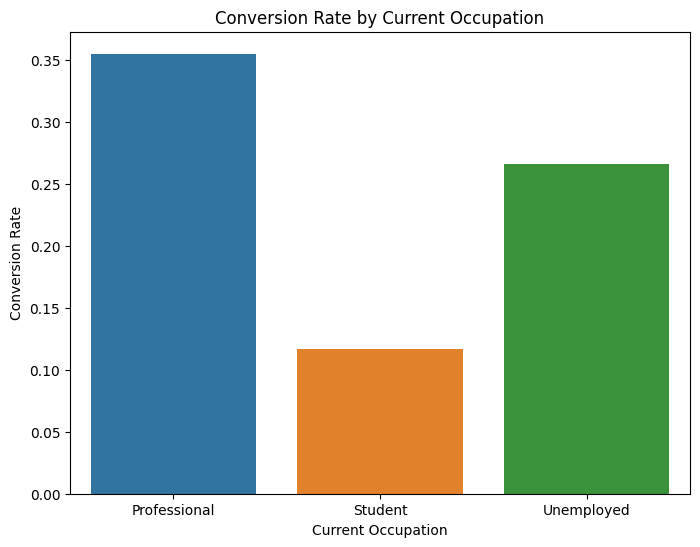

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='current_occupation', y='status', data = occupation_lead)
plt.title('Conversion Rate by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Conversion Rate')
plt.show()

- 35.51% of leads with the 'Professional' occupation were converted to paid customers.
- 26.58% of leads with the 'unemployed' occupation were converted to paid customers and 11.71% of the 'Student' occupation were converted to paid customers.

In [17]:
interaction_lead = data.groupby('first_interaction')['status'].mean().reset_index()
print(interaction_lead)

  first_interaction  status
0        Mobile App 0.10531
1           Website 0.45594


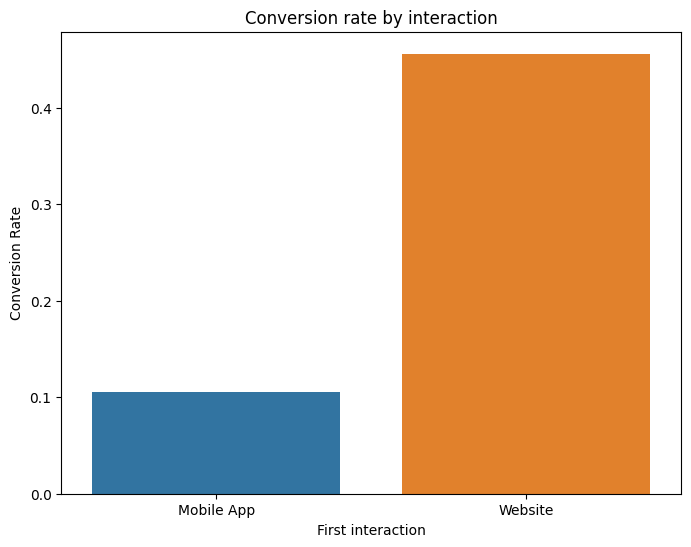

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x='first_interaction', y='status', data=interaction_lead)
plt.title('Conversion rate by interaction')
plt.xlabel('First interaction')
plt.ylabel('Conversion Rate')
plt.show()

- This shows that those fiirst interacted to ExtraaLearn first through website had a much highter conversion rate than those who used the mobile app.

In [19]:
interaction_activity = data.groupby('last_activity')['status'].mean().reset_index()
print(interaction_activity)

      last_activity  status
0    Email Activity 0.30334
1    Phone Activity 0.21313
2  Website Activity 0.38455


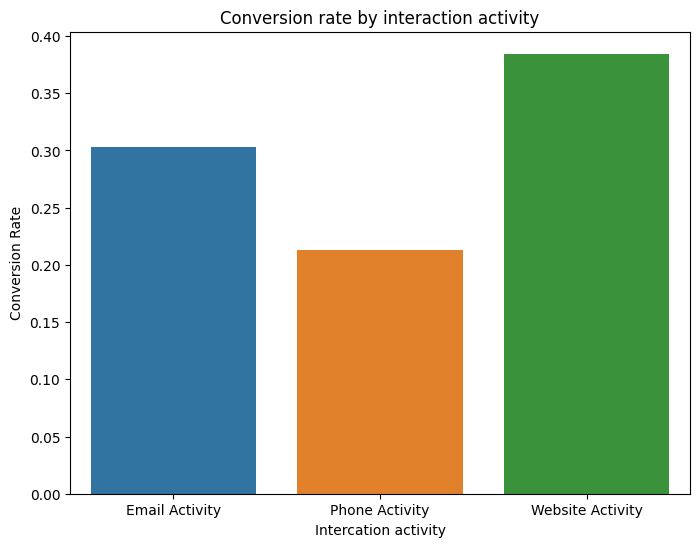

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x='last_activity', y='status', data= interaction_activity)
plt.title('Conversion rate by interaction activity')
plt.xlabel('Intercation activity')
plt.ylabel('Conversion Rate')
plt.show()

- Website activity works best with 38% conversion rate

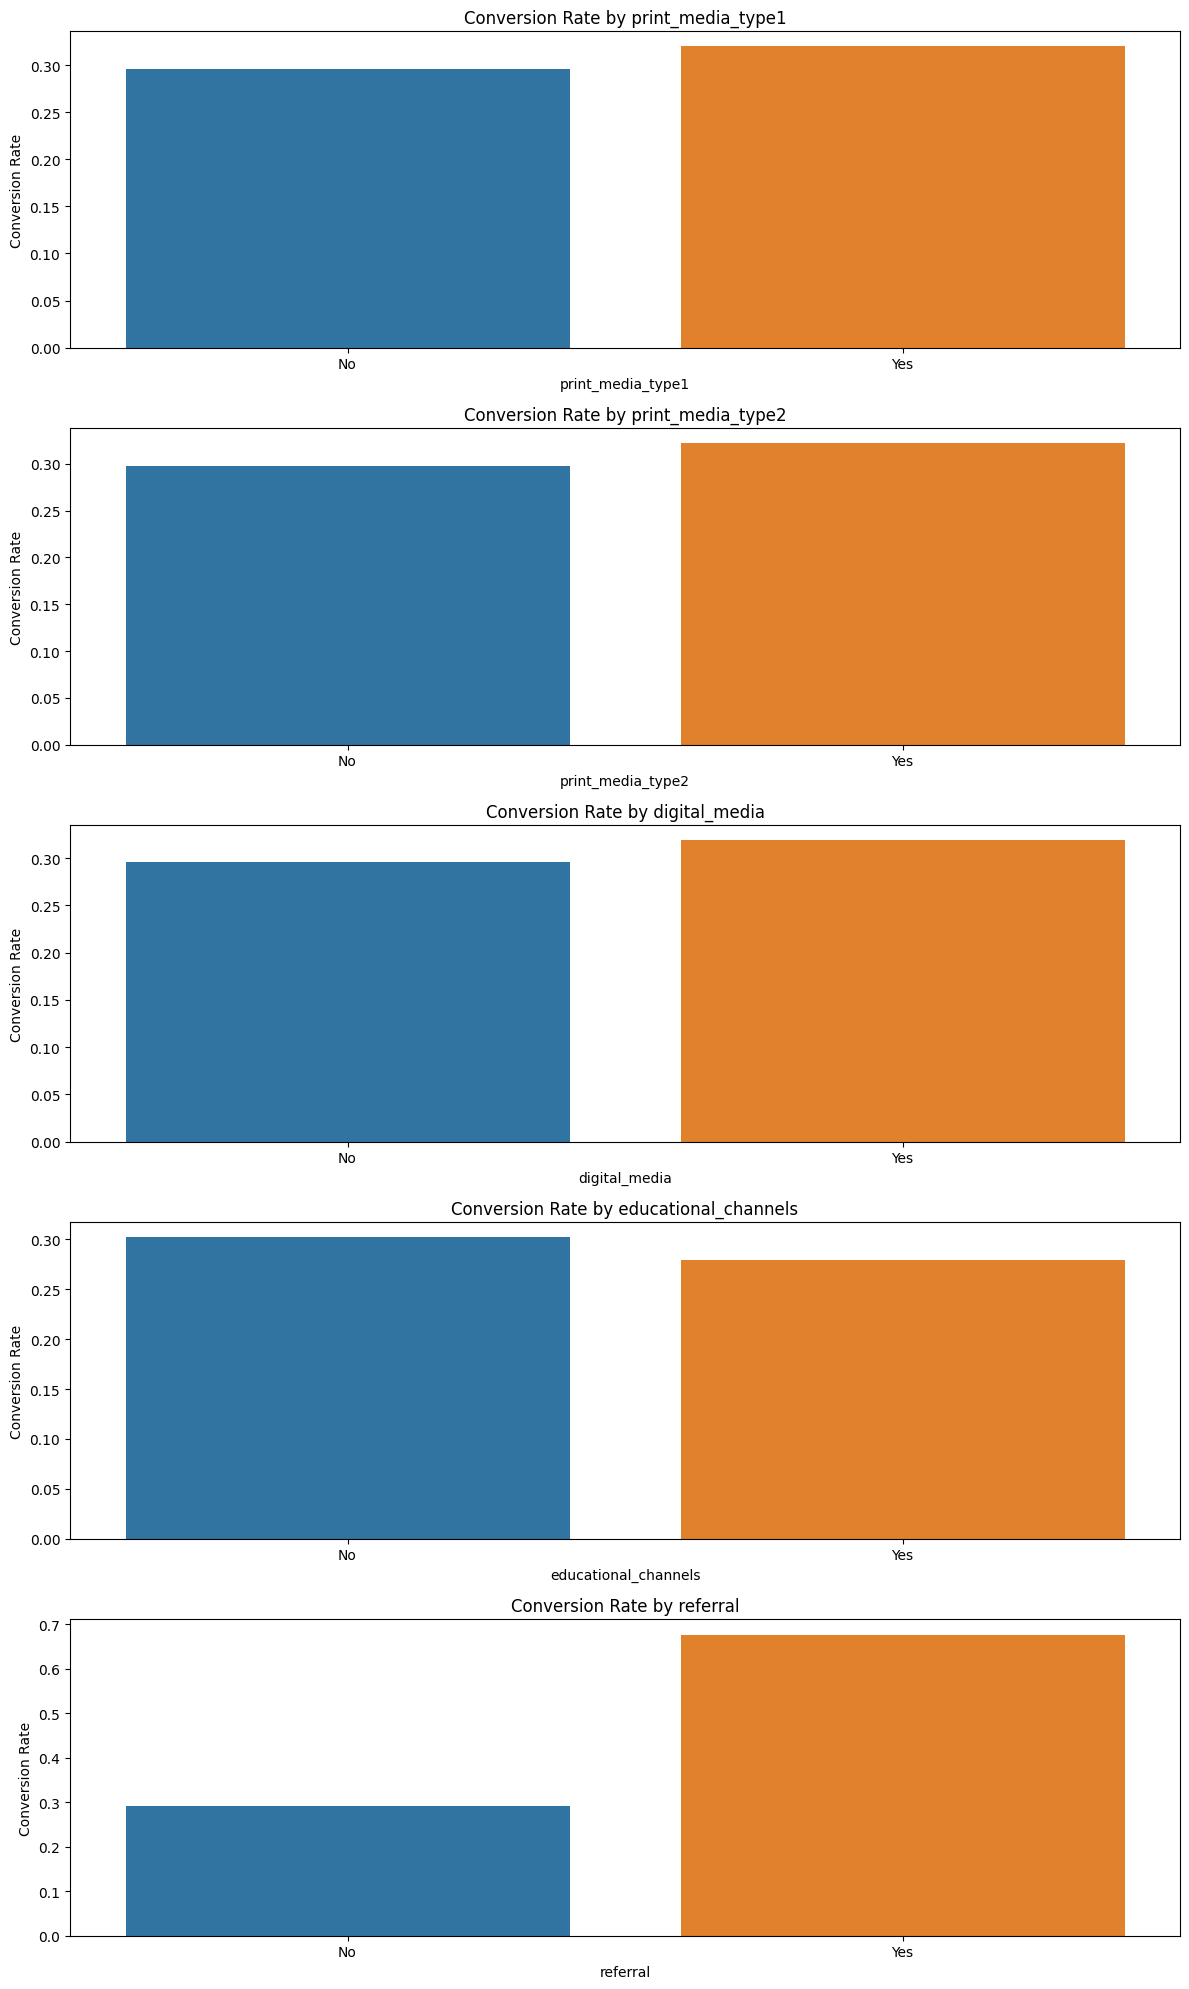

In [21]:
# List of lead sources
lead_sources = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Create subplots for each source
plt.figure(figsize=(12, 4 * len(lead_sources)))
for i, source in enumerate(lead_sources):
    plt.subplot(len(lead_sources), 1, i + 1)
    source_conversion = data.groupby(source)['status'].mean().reset_index()
    sns.barplot(x=source, y='status', data=source_conversion)
    plt.title(f'Conversion Rate by {source}')
    plt.xlabel(source)
    plt.ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

- Print media type 1 ,2 and digital media has equal conversion rate and at the top with 35%

In [22]:
# Calculate conversion rate by profile completion
conversion_by_profile = data.groupby('profile_completed')['status'].mean().reset_index()
print(conversion_by_profile)


  profile_completed  status
0              High 0.41784
1               Low 0.07477
2            Medium 0.18876


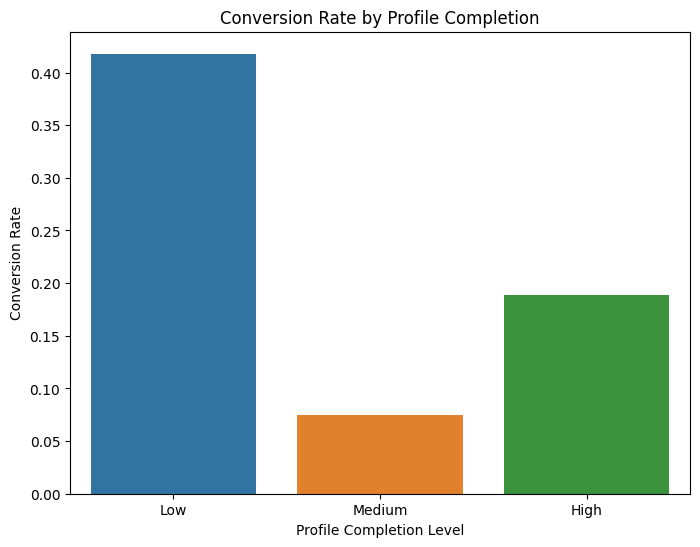

In [23]:
# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x='profile_completed', y='status', data=conversion_by_profile)
plt.title('Conversion Rate by Profile Completion')
plt.xlabel('Profile Completion Level')
plt.ylabel('Conversion Rate')
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.show()

- The chart shows there is no dependency on profile completion and conversion rate.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [24]:
# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 
                                     'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 
                                     'referral'], drop_first=True)

In [25]:
# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['ID', 'status'])
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Calculate class weights to handle class imbalance
class_weights = dict(zip([0, 1], ((len(y) - y.sum()) / (2 * y.sum()), (len(y) - y.sum()) / (2 * (len(y) - y.sum())))))

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building a Decision Tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

## Model Performance evaluation and improvement

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_decision_tree)
precision = precision_score(y_test, y_pred_decision_tree)
recall = recall_score(y_test, y_pred_decision_tree)
f1 = f1_score(y_test, y_pred_decision_tree)
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.8071505958829902
Precision: 0.6804511278195489
Recall: 0.6605839416058394
F1 Score: 0.6703703703703704
ROC-AUC Score: 0.7648066087073881
Confusion Matrix:
[[564  85]
 [ 93 181]]


In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Re-train the model with the best parameters
best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)
best_decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

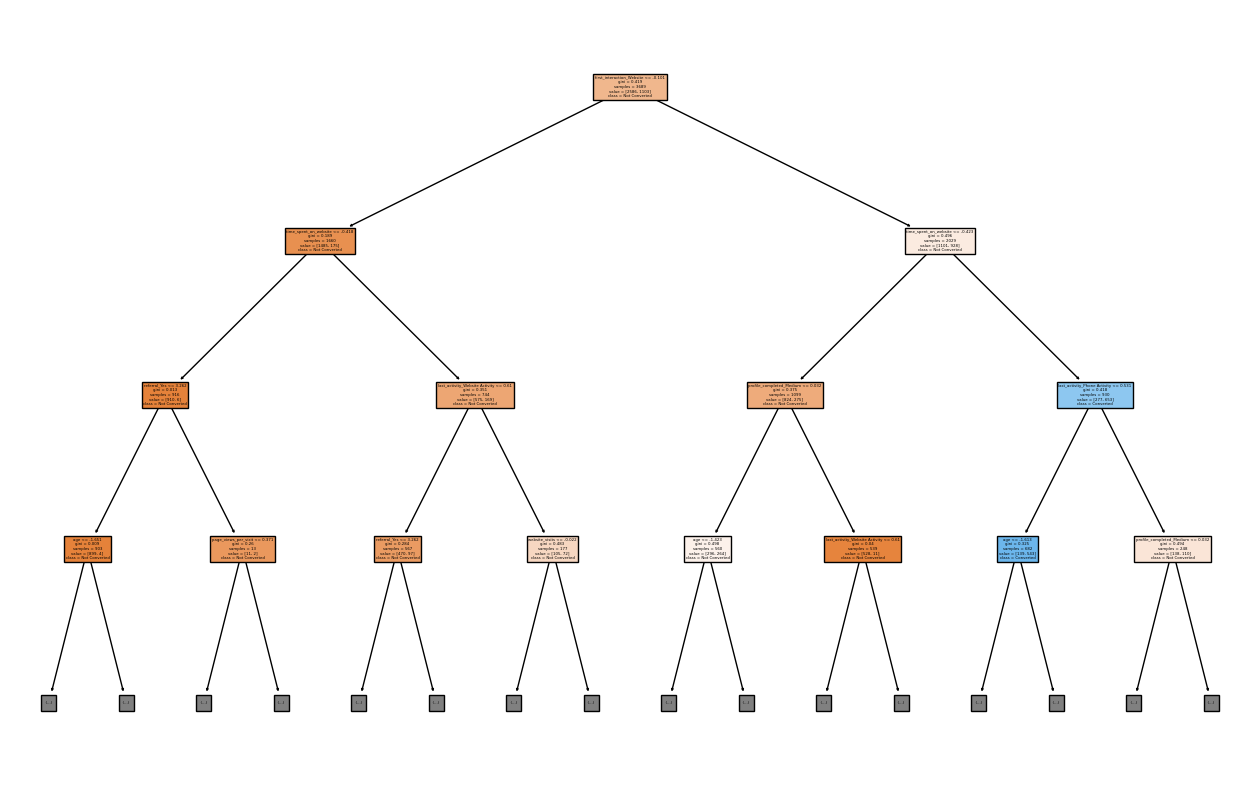

In [31]:
from sklearn.tree import plot_tree  # Import the plot_tree function

# Create a figure for the tree plot
plt.figure(figsize=(16, 10))

# Plot the decision tree
plot_tree(best_decision_tree, feature_names=X.columns, filled=True, class_names=['Not Converted', 'Converted'], max_depth=3)

# Show the plot
plt.show()

In [32]:
from sklearn.tree import export_text

tree_rules = export_text(best_decision_tree, feature_names=list(X.columns))
print(tree_rules)

|--- first_interaction_Website <= -0.10
|   |--- time_spent_on_website <= -0.42
|   |   |--- referral_Yes <= 3.26
|   |   |   |--- age <= -1.65
|   |   |   |   |--- time_spent_on_website <= -0.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- time_spent_on_website >  -0.78
|   |   |   |   |   |--- time_spent_on_website <= -0.65
|   |   |   |   |   |   |--- last_activity_Website Activity <= 0.61
|   |   |   |   |   |   |   |--- page_views_per_visit <= -0.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- page_views_per_visit >  -0.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- last_activity_Website Activity >  0.61
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- time_spent_on_website >  -0.65
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- age >  -1.65
|   |   |   |   |--- class: 0
|   |   |--- referral_Yes >  3.26
|   |   |   |--- page_views_per_visit <= 0.37
|   |   |   |   |--- class: 0
| 

In [33]:
# Predict on the test data using the best Decision Tree model
y_pred_best_decision_tree = best_decision_tree.predict(X_test_scaled)

# Calculate metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best_decision_tree)
precision_best = precision_score(y_test, y_pred_best_decision_tree)
recall_best = recall_score(y_test, y_pred_best_decision_tree)
f1_best = f1_score(y_test, y_pred_best_decision_tree)
roc_auc_best = roc_auc_score(y_test, best_decision_tree.predict_proba(X_test_scaled)[:, 1])
conf_matrix_best = confusion_matrix(y_test, y_pred_best_decision_tree)

print("Metrics for the Best Decision Tree Model:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"ROC-AUC Score: {roc_auc_best}")
print("Confusion Matrix:")
print(conf_matrix_best)

Metrics for the Best Decision Tree Model:
Accuracy: 0.8396533044420368
Precision: 0.752
Recall: 0.6861313868613139
F1 Score: 0.717557251908397
ROC-AUC Score: 0.8716498149876846
Confusion Matrix:
[[587  62]
 [ 86 188]]


## Building a Random Forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Calculate metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
roc_auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:, 1])
conf_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)

# Print the metrics
print("Metrics for the Random Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC-AUC Score: {roc_auc_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

Metrics for the Random Forest Model:
Accuracy: 0.866738894907909
Precision: 0.8185654008438819
Recall: 0.708029197080292
F1 Score: 0.7592954990215264
ROC-AUC Score: 0.9180828450282861
Confusion Matrix:
[[606  43]
 [ 80 194]]


## Model Performance evaluation and improvement

In [35]:
# Baseline Model Evaluation
# Create and train a baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Evaluate baseline model
baseline_y_pred = baseline_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_y_pred)
baseline_precision = precision_score(y_test, baseline_y_pred)
baseline_recall = recall_score(y_test, baseline_y_pred)
baseline_f1 = f1_score(y_test, baseline_y_pred)
baseline_roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test_scaled)[:, 1])

# Print baseline model metrics
print("Baseline Model Metrics:")
print(f"Accuracy: {baseline_accuracy}")
print(f"Precision: {baseline_precision}")
print(f"Recall: {baseline_recall}")
print(f"F1 Score: {baseline_f1}")
print(f"ROC-AUC Score: {baseline_roc_auc}")

Baseline Model Metrics:
Accuracy: 0.8689057421451788
Precision: 0.825531914893617
Recall: 0.708029197080292
F1 Score: 0.7622789783889979
ROC-AUC Score: 0.9179197642639433


In [36]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [38]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight=class_weights),
                           param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Re-train the model with the best parameters
best_random_forest = RandomForestClassifier(random_state=42, class_weight=class_weights, **best_params)
best_random_forest.fit(X_train_scaled, y_train)

# Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_random_forest, X_train_scaled, y_train, cv=5, scoring='roc_auc')
average_cv_score = np.mean(cv_scores)

# Print cross-validation score
print(f"Average Cross-Validation ROC-AUC Score: {average_cv_score}")

Average Cross-Validation ROC-AUC Score: 0.9235764613316098


## Actionable Insights and Recommendations

- Leads with a "Professional" occupation have a significantly higher conversion rate (around 35.5%) compared to "Unemployed" and "Student" leads. ExtraaLearn should focus more on targeting professionals and tailor their marketing strategies to appeal to this group.
- The first interaction channel plays a crucial role in lead conversion. Leads who first interacted with ExtraaLearn through the website had a much higher conversion rate (around 45.6%) than those who used the mobile app (around 10.5%). ExtraaLearn should invest more resources in optimizing the website for lead acquisition.
- Website activity is the most effective interaction method, with a 38.5% conversion rate. Email activity follows with a 30.3% conversion rate. ExtraaLearn should continue to engage leads through these channels and provide relevant and timely information.
- Print media type 1, print media type 2, and digital media have similar conversion rates at the top with around 35%. ExtraaLearn should continue investing in these advertising channels. Additionally, referral programs should be encouraged, as they have the potential to bring in high-converting leads.
- Profile completion does not appear to have a significant impact on conversion rates. Therefore, ExtraaLearn may not need to prioritize increasing profile completion but should focus on other factors that drive conversions.
- The Random Forest model with hyperparameter tuning outperforms the Decision Tree model in terms of ROC-AUC score (around 0.918 vs. 0.871) and F1 score (around 0.759 vs. 0.717). Therefore, ExtraaLearn should consider deploying the Random Forest model for lead conversion prediction.
- A score of 0.9236 indicates that the Random Forest Classifier has a strong ability to distinguish between positive and negative classes.
- ExtraaLearn should continue experimenting with different machine learning models and feature engineering techniques to further improve prediction accuracy.
- Implement real-time or near-real-time monitoring of the lead conversion prediction model to detect changes in lead behavior and adjust strategies accordingly.
- Segment leads based on their characteristics and behaviors, such as occupation, interaction channel, and activity. Tailor marketing and communication strategies to each segment to maximize conversion rates.
- Establish a feedback loop between the marketing and sales teams to gather insights into why certain leads convert and others do not. This information can be used to refine lead acquisition strategies.
- Ensure the data collection process is accurate and up to date. Periodically review and update customer profiles to maintain data quality.
- Collaborate closely with the sales team to align marketing efforts with the sales process. Sales representatives can provide valuable feedback on the quality of leads generated.
- Implement marketing automation tools to streamline lead nurturing and follow-up processes, ensuring that leads receive timely and relevant information.


- Machine learning models and lead conversion strategies should be treated as dynamic and subject to continuous improvement. Regularly update the model with new data and adapt strategies based on changing market conditions.













